In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Extracão

In [116]:
# Carregar o JSON
dados_clientes = pd.read_json('/content/TelecomX_Data.json')
dados_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [117]:
# Criar um DataFrame base com apenas customerID e Churn
df_base = dados_clientes[['customerID', 'Churn']].copy()

In [118]:
# Normalizar colunas aninhadas e adicionar o customerID a cada uma
df_norm_customer = pd.json_normalize(dados_clientes['customer'])
df_norm_phone    = pd.json_normalize(dados_clientes['phone'])
df_norm_internet = pd.json_normalize(dados_clientes['internet'])
df_norm_account  = pd.json_normalize(dados_clientes['account'])

# Concatenar tudo com a coluna customerID
df_normalizado = pd.concat([df_base, df_norm_customer, df_norm_phone, df_norm_internet, df_norm_account], axis=1)

# Visualizar o DataFrame final
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [119]:
# Visualiza o nome das colunas do DataFrame
print(df_normalizado.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


# 📌 Transformação

In [120]:
# Ver estrutura do DataFrame
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [121]:
# Conferir tipos
df_normalizado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [122]:
# Visão geral rápida
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Avaliando as colunas categóricas

In [123]:
# Verifica e imprime os dados existentes nas colunas categóricas
for col in ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']:
    print(f"{col}: {df_normalizado[col].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [124]:
# Para ver colunas categóricas e frequências
df_normalizado.describe(include='object')

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [125]:
# Convertendo para booleano
binarias = ['Churn']
for col in binarias:
    df_normalizado[col] = df_normalizado[col].map({'Yes': True, 'No': False})

## Avaliando as colunas numéricas

In [126]:
# Apenas para colunas numéricas
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [127]:
# Verificar colunas com valores nulos
df_normalizado.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [128]:
# Convertendo colunas de valores monetários, se vieram como string
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

# Conferindo se causou nulos após conversão
df_normalizado[['Charges.Total']].isnull().sum()

,0
Charges.Total,11


In [129]:
df_normalizado[df_normalizado['Charges.Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,False,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [130]:
# Atualizando dados vazios em Charges total para 0
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

In [131]:
# Verificando duplicatas
df_normalizado.duplicated().sum()

np.int64(0)

In [132]:
colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in colunas_binarias:
    print(f'{col}: {df_normalizado[col].unique()}')

Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']
Churn: [False True nan]


In [133]:
# Verificar os valores únicos da coluna Churn
df_normalizado['Churn'].value_counts(dropna=False)

,count
Churn,
False,5174
True,1869
NaN,224


In [134]:
# Substituir strings vazias por NaN
import numpy as np

df_normalizado['Churn'] = df_normalizado['Churn'].replace('', np.nan)

# Verificar quantos valores ausentes ficaram
df_normalizado['Churn'].isnull().sum()

np.int64(224)

In [135]:
# Remover registros com Churn nulo (Como a análise principal é nesse item, dados ausentes nesse campo serão desconsiderados)
df_normalizado = df_normalizado.dropna(subset=['Churn'])

In [136]:
# Verificar os valores únicos da coluna Churn
df_normalizado['Churn'].value_counts(dropna=False)

,count
Churn,
False,5174
True,1869


In [137]:
# Checando possível inconsistência de Charges total = 0 e Tenure > 0
inconsistentes = df_normalizado[(df_normalizado['Charges.Total'] == 0) & (df_normalizado['tenure'] > 0)]

inconsistentes.head()

print(f"Total de registros inconsistentes: {len(inconsistentes)}")

Total de registros inconsistentes: 0


In [138]:
df_normalizado['Contas_Diarias'] = df_normalizado['Charges.Monthly'] / 30

In [139]:
df_normalizado[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [140]:
# Deixando 2 casas decimais
df_normalizado['Contas_Diarias'] = df_normalizado['Contas_Diarias'].round(2)

In [141]:
# Renomear colunas para nomes em português
df_normalizado.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Tem_Parceiro',
    'Dependents': 'Tem_Dependentes',
    'tenure': 'Meses_Contrato',
    'PhoneService': 'Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'TV_Streaming',
    'StreamingMovies': 'Filmes_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Digital',
    'PaymentMethod': 'Forma_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total'
}, inplace=True)

In [142]:
# Dicionário de tradução dos valores categóricos
traducao_categorias = {
    'Genero': {'Female': 'Feminino', 'Male': 'Masculino'},
    'Tem_Parceiro': {'Yes': 'Sim', 'No': 'Não'},
    'Tem_Dependentes': {'Yes': 'Sim', 'No': 'Não'},
    'Telefone': {'Yes': 'Sim', 'No': 'Não'},
    'Multiplas_Linhas': {
        'Yes': 'Sim',
        'No': 'Não',
        'No phone service': 'Sem serviço telefônico'
    },
    'Tipo_Internet': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra ótica',
        'No': 'Sem internet'
    },
    'Seguranca_Online': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'Backup_Online': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'Protecao_Dispositivo': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'Suporte_Tecnico': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'TV_Streaming': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'Filmes_Streaming': {
        'Yes': 'Sim',
        'No': 'Não',
        'No internet service': 'Sem internet'
    },
    'Tipo_Contrato': {
        'Month-to-month': 'Mensal',
        'One year': 'Anual (1 ano)',
        'Two year': 'Bienal (2 anos)'
    },
    'Fatura_Digital': {'Yes': 'Sim', 'No': 'Não'},
    'Forma_Pagamento': {
        'Electronic check': 'Débito automático',
        'Mailed check': 'Boleto por correio',
        'Bank transfer (automatic)': 'Transferência bancária (automática)',
        'Credit card (automatic)': 'Cartão de crédito (automático)'
    }
}

# Aplicar as traduções no DataFrame
for coluna, mapa in traducao_categorias.items():
    if coluna in df_normalizado.columns:
        df_normalizado[coluna] = df_normalizado[coluna].replace(mapa)

In [143]:
# Verifica e imprime os dados existentes nas colunas categóricas (versão em português)
for col in ['Evasao', 'Genero', 'Tem_Parceiro', 'Tem_Dependentes', 'Telefone', 'Multiplas_Linhas',
            'Tipo_Internet', 'Seguranca_Online', 'Backup_Online',
            'Protecao_Dispositivo', 'Suporte_Tecnico', 'TV_Streaming',
            'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
            'Forma_Pagamento']:
    print(f"{col}: {df_normalizado[col].unique()}")

Evasao: [False True]
Genero: ['Feminino' 'Masculino']
Tem_Parceiro: ['Sim' 'Não']
Tem_Dependentes: ['Sim' 'Não']
Telefone: ['Sim' 'Não']
Multiplas_Linhas: ['Não' 'Sim' 'Sem serviço telefônico']
Tipo_Internet: ['DSL' 'Fibra ótica' 'Sem internet']
Seguranca_Online: ['Não' 'Sim' 'Sem internet']
Backup_Online: ['Sim' 'Não' 'Sem internet']
Protecao_Dispositivo: ['Não' 'Sim' 'Sem internet']
Suporte_Tecnico: ['Sim' 'Não' 'Sem internet']
TV_Streaming: ['Sim' 'Não' 'Sem internet']
Filmes_Streaming: ['Não' 'Sim' 'Sem internet']
Tipo_Contrato: ['Anual (1 ano)' 'Mensal' 'Bienal (2 anos)']
Fatura_Digital: ['Sim' 'Não']
Forma_Pagamento: ['Boleto por correio' 'Débito automático' 'Cartão de crédito (automático)'
 'Transferência bancária (automática)']


In [144]:
colunas_categoria = ['Genero', 'Tem_Parceiro','Tem_Dependentes','Telefone','Fatura_Digital', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online','Protecao_Dispositivo','Suporte_Tecnico','TV_Streaming','Filmes_Streaming', 'Tipo_Contrato', 'Forma_Pagamento']
for col in colunas_categoria:
    df_normalizado[col] = df_normalizado[col].astype('category')

In [145]:
df_normalizado.dtypes

,0
ID_Cliente,object
Evasao,object
Genero,category
Idoso,int64
Tem_Parceiro,category
Tem_Dependentes,category
Meses_Contrato,int64
Telefone,category
Multiplas_Linhas,category
Tipo_Internet,category


# 📊 Carga e Análise (L - Load & Analysis)

In [146]:
# Sumário estatístico geral (dados numéricos)
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
Idoso,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Meses_Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
Cobranca_Mensal,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
Cobranca_Total,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Contas_Diarias,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


In [147]:
# Convertendo Churn para 0 e 1
df_normalizado['Evasao'] = df_normalizado['Evasao'].astype(int)

# Distribuição de Evasão (Churn)
df_normalizado['Evasao'].value_counts(normalize=True) * 100

,proportion
Evasao,
0,73.463013
1,26.536987


In [148]:
df_normalizado.to_csv("dados_tratados.csv", index=False)

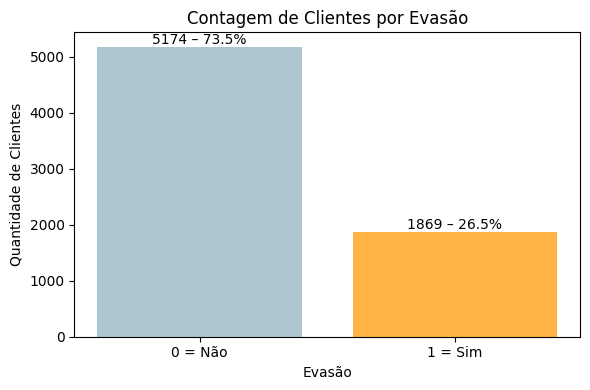

In [149]:
# Contagem e proporção dos valores de evasão
contagem = df_normalizado['Evasao'].value_counts().sort_index()
proporcao = df_normalizado['Evasao'].value_counts(normalize=True).sort_index() * 100

# Rótulos e cores
labels = ['0 = Não', '1 = Sim']
cores = ['#AEC6CF', '#FFB347']  # pastel azul e laranja

# Criação do gráfico
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, contagem.values, color=cores)

# Título e eixos
plt.title('Contagem de Clientes por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Quantidade de Clientes')

# Adiciona rótulos com quantidade + percentual
for bar, qtd, perc in zip(bars, contagem.values, proporcao.values):
    altura = bar.get_height()
    texto = f'{qtd} – {perc:.1f}%'
    plt.text(bar.get_x() + bar.get_width()/2, altura + max(contagem)*0.01, texto,
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [150]:
# Análise de perfil dos clientes
df_normalizado[['Cobranca_Mensal', 'Cobranca_Total', 'Meses_Contrato', 'Contas_Diarias']].agg(['mean', 'median', 'std'])

,Cobranca_Mensal,Cobranca_Total,Meses_Contrato,Contas_Diarias
mean,64.761692,2279.734304,32.371149,2.158675
median,70.350000,1394.550000,29.000000,2.340000
std,30.090047,2266.794470,24.559481,1.003088


## Análise das variáveis categóricas

In [151]:
# Distribuição por gênero
df_normalizado['Genero'].value_counts(normalize=True) * 100

,proportion
Genero,
Masculino,50.47565
Feminino,49.52435


In [152]:
# Forma de pagamento e churn
df_normalizado.groupby('Forma_Pagamento')['Evasao'].mean().sort_values(ascending=False) * 100

/tmp/ipython-input-266354361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_normalizado.groupby('Forma_Pagamento')['Evasao'].mean().sort_values(ascending=False) * 100


,Evasao
Forma_Pagamento,
Débito automático,45.285412
Boleto por correio,19.106700
Transferência bancária (automática),16.709845
Cartão de crédito (automático),15.243101


In [153]:
# Comparando valores médios entre clientes com e sem evasão
df_normalizado.groupby('Evasao')[['Cobranca_Mensal', 'Cobranca_Total', 'Meses_Contrato']].mean().round(2)

,Cobranca_Mensal,Cobranca_Total,Meses_Contrato
Evasao,,,
0,61.27,2549.91,37.57
1,74.44,1531.80,17.98


## Análise Gráfica

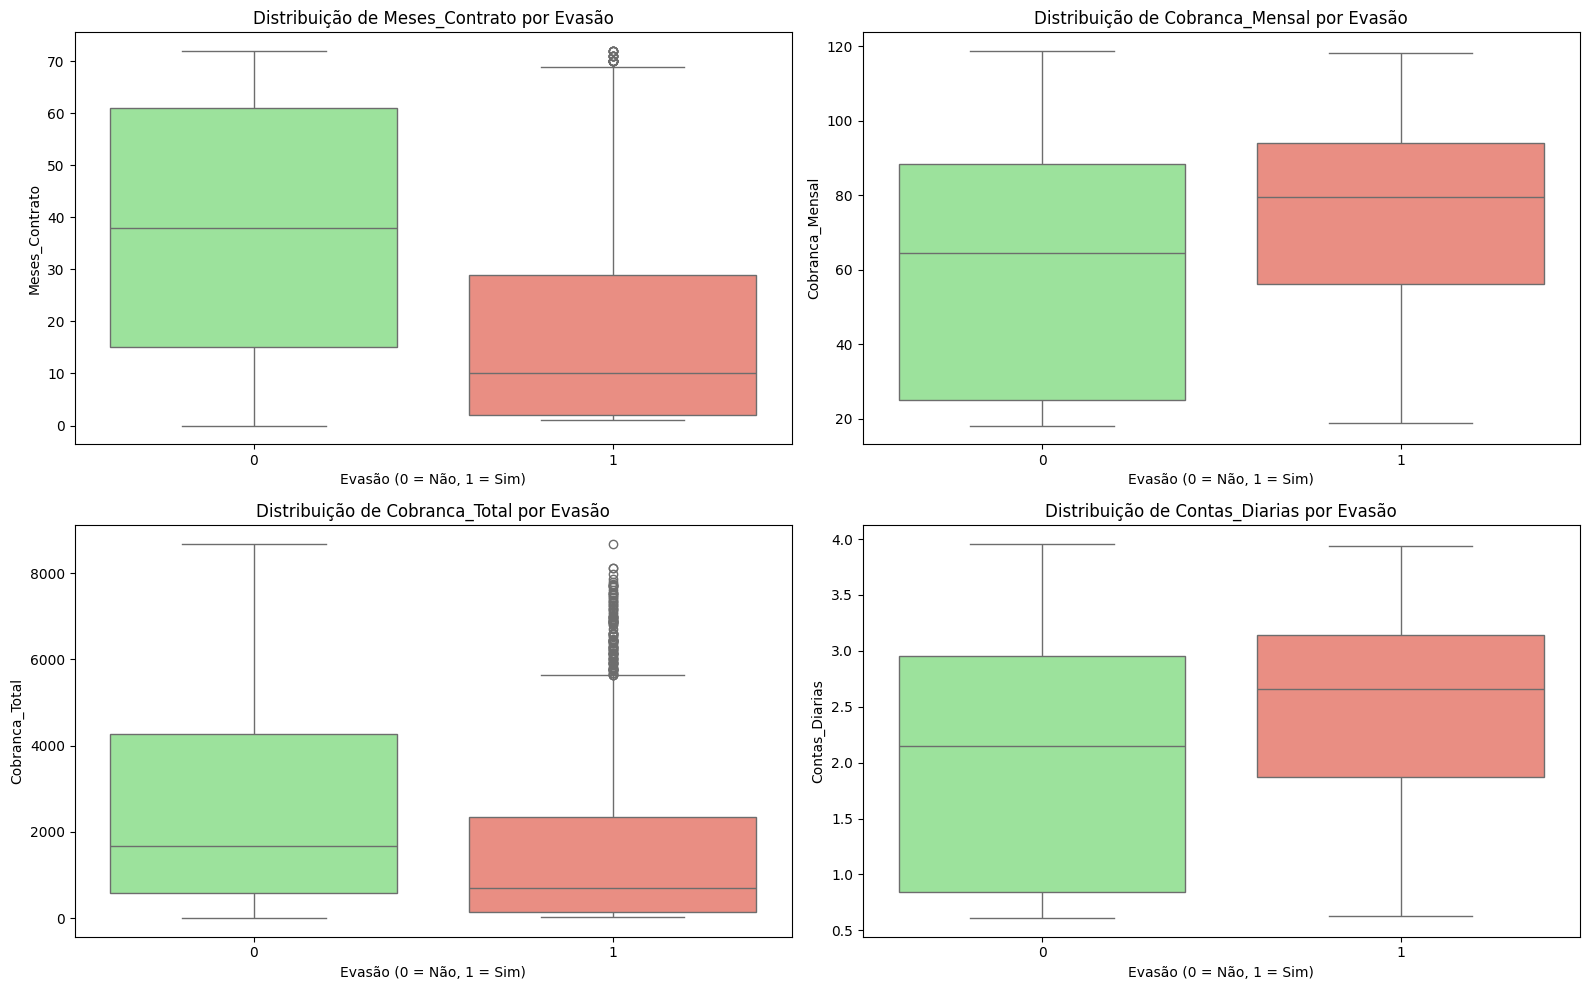

In [154]:
# Boxplot para comparar distribuição entre clientes com churn e sem churn
plt.figure(figsize=(16, 10))

# Define the list of numerical columns to plot
numericas = ['Meses_Contrato', 'Cobranca_Mensal', 'Cobranca_Total', 'Contas_Diarias']

for i, var in enumerate(numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_normalizado, x='Evasao', y=var, hue='Evasao', palette={0: 'lightgreen', 1: 'salmon'}, dodge=False)
    plt.title(f'Distribuição de {var} por Evasão')
    plt.xlabel('Evasão (0 = Não, 1 = Sim)')
    plt.ylabel(var)
    plt.legend([], [], frameon=False)  # oculta legenda redundante

plt.tight_layout()
plt.savefig('box_plots.png', dpi=300, bbox_inches='tight')
plt.show()

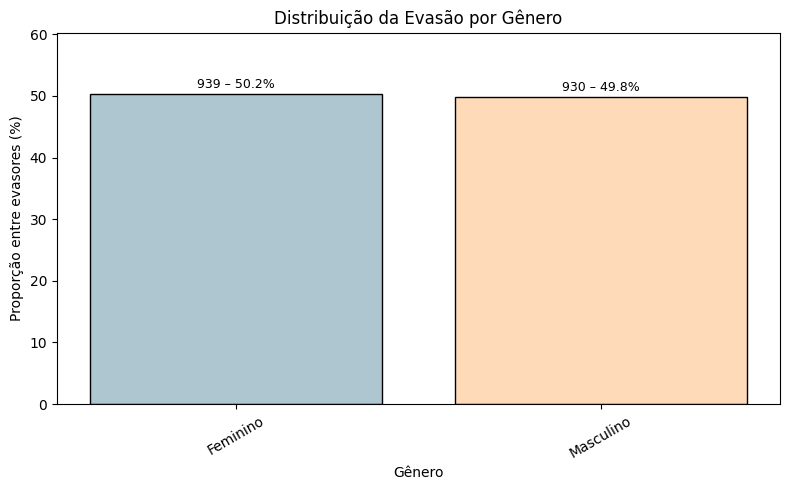

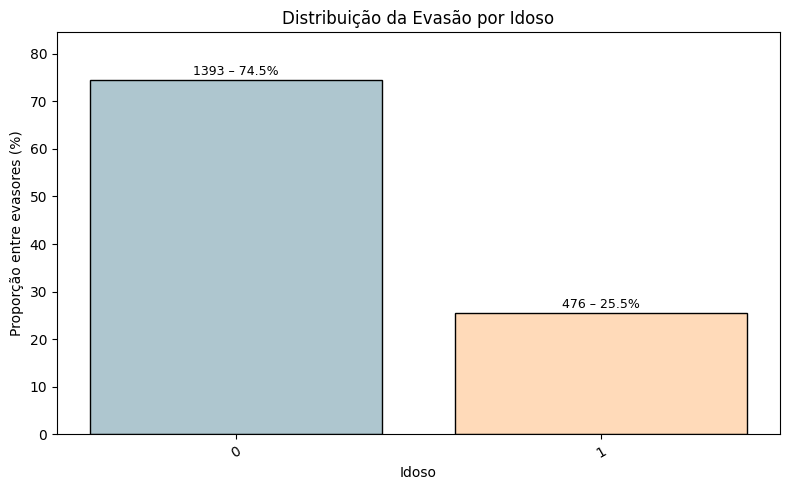

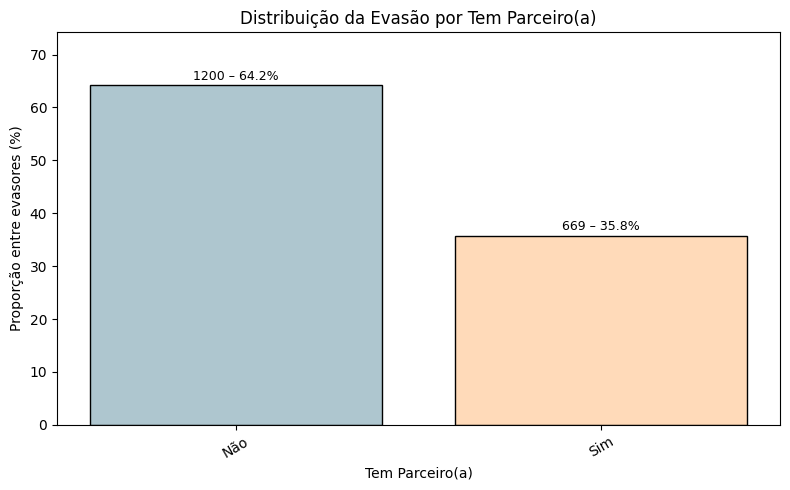

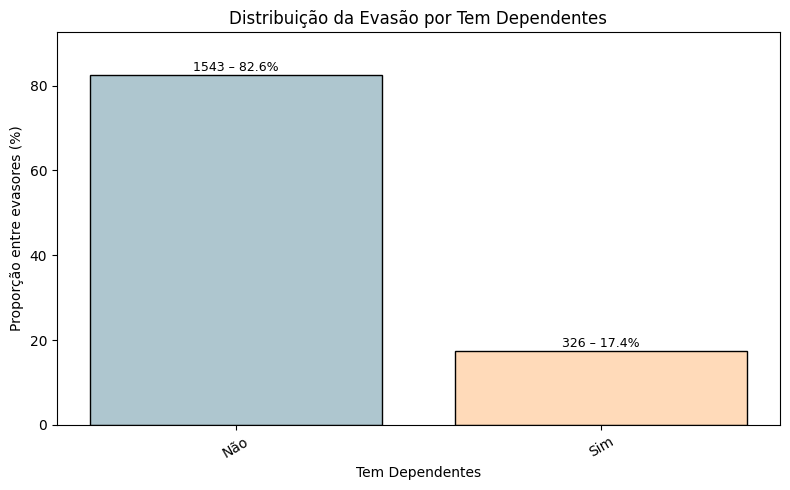

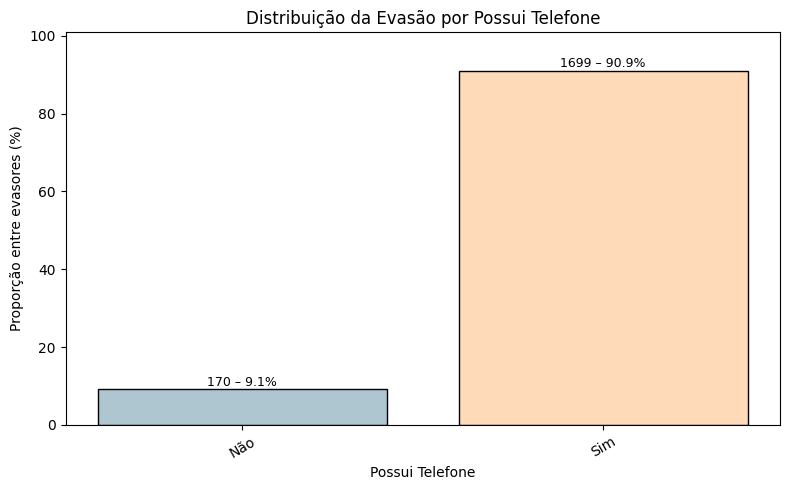

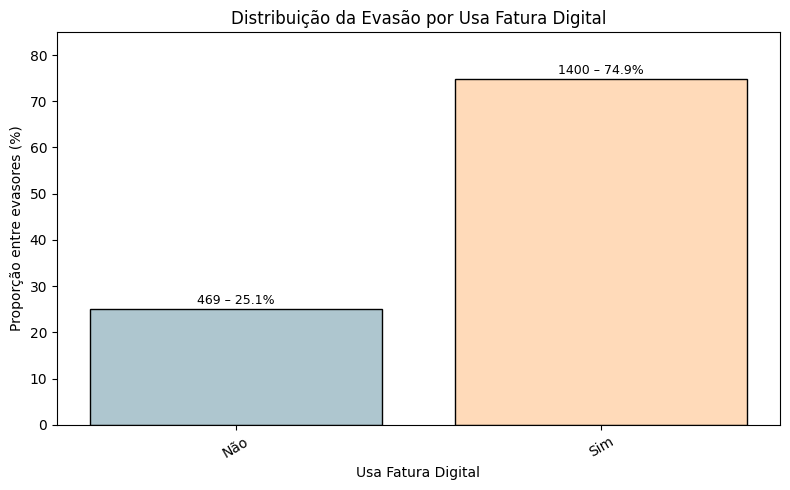

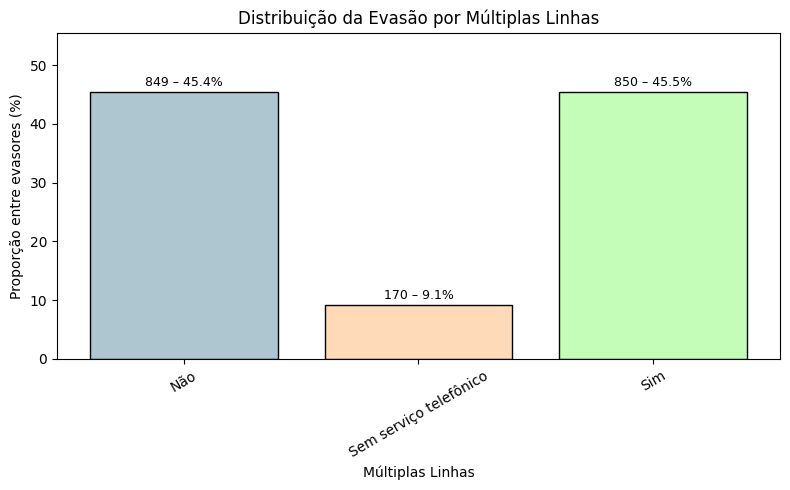

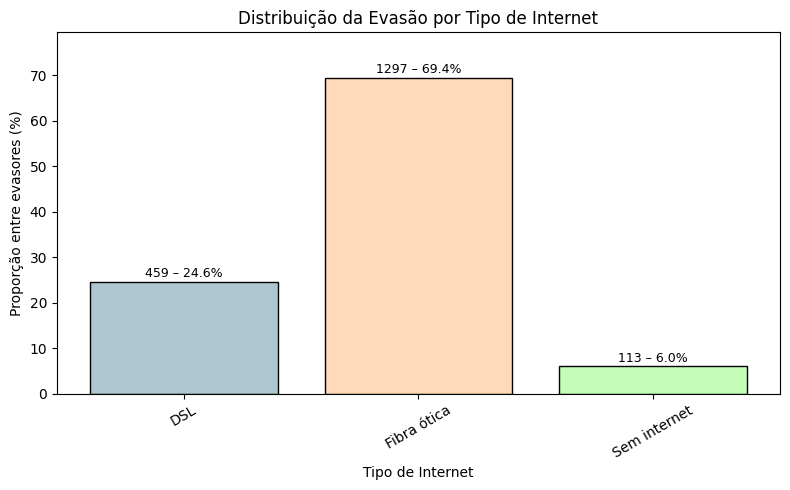

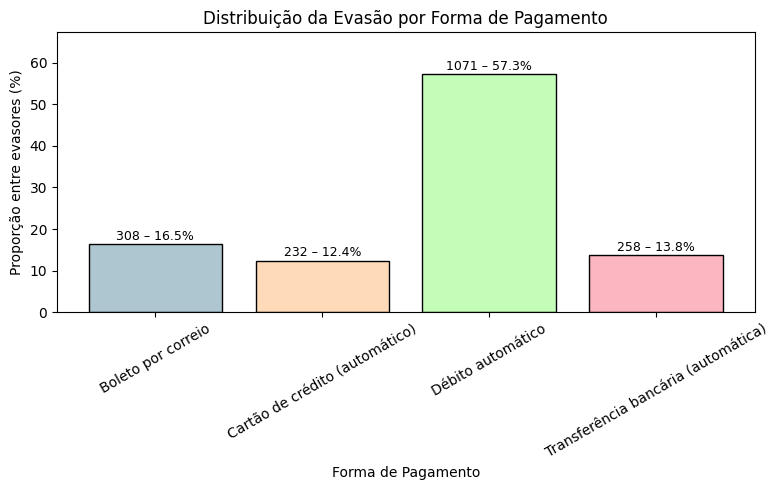

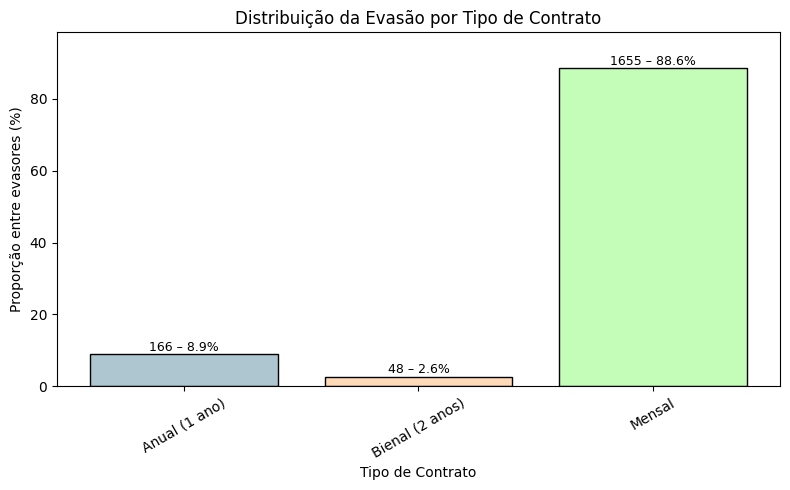

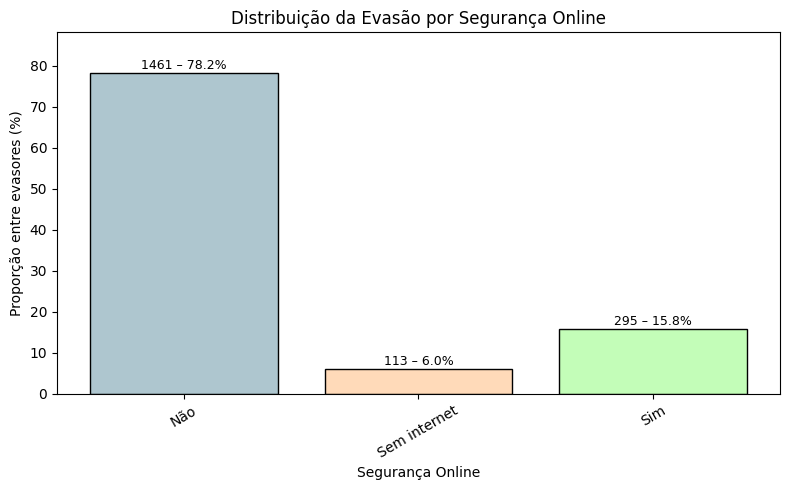

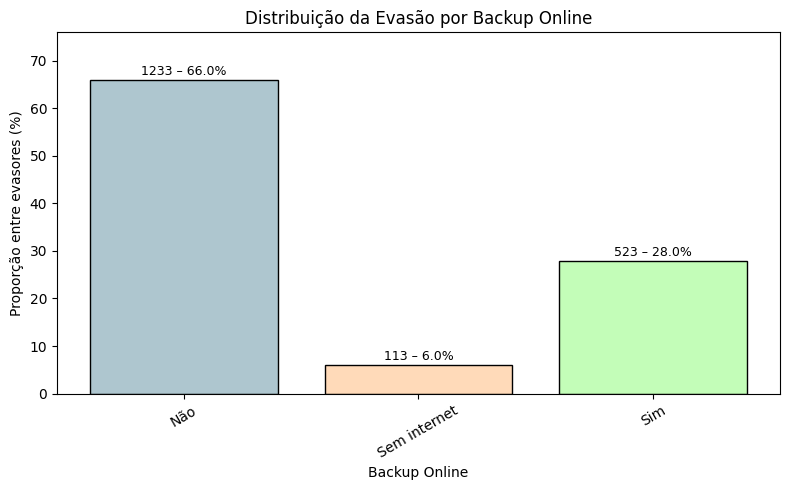

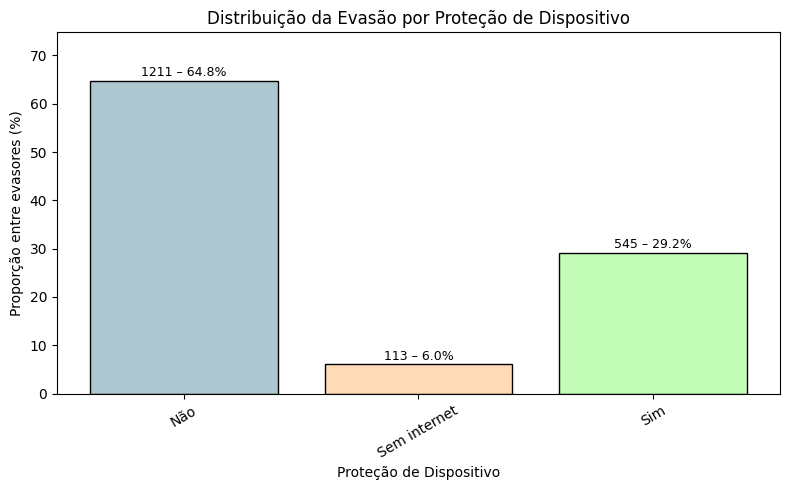

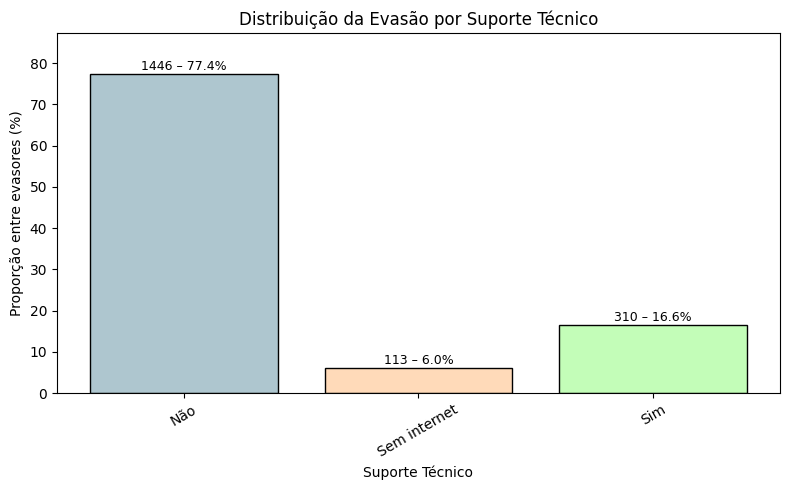

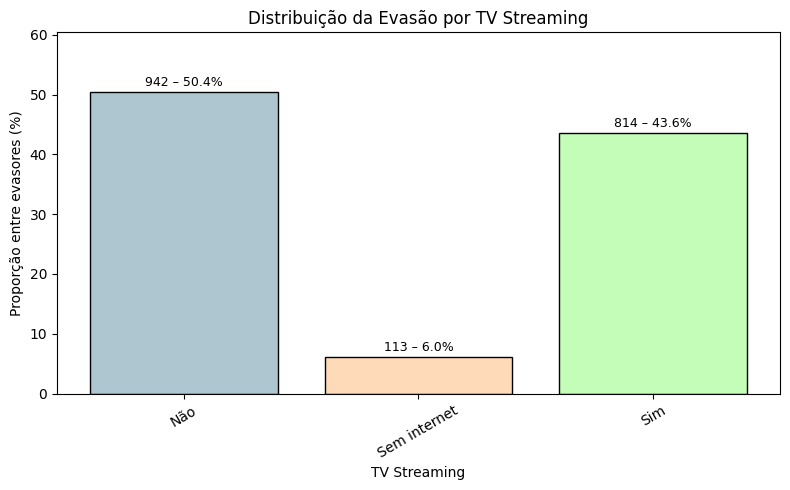

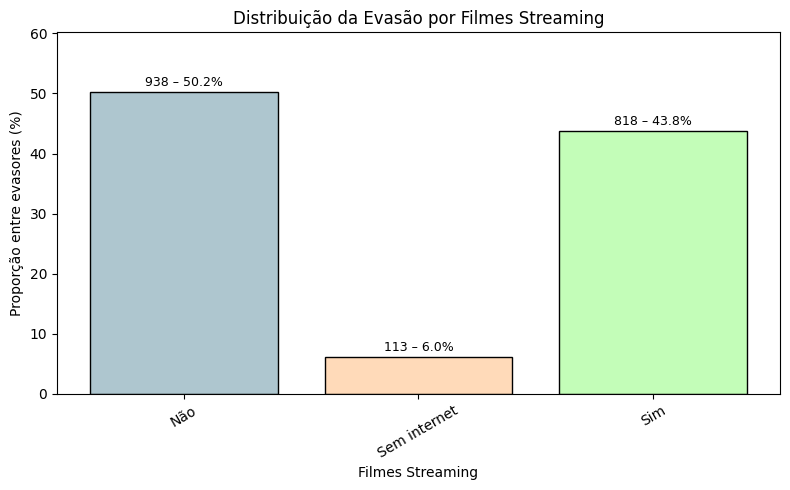

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtra os clientes que evadiram
evasao = df_normalizado[df_normalizado['Evasao'] == 1]

# Dicionário com variáveis categóricas e títulos legíveis
variaveis = {
    'Genero': 'Gênero',
    'Idoso': 'Idoso',
    'Tem_Parceiro': 'Tem Parceiro(a)',
    'Tem_Dependentes': 'Tem Dependentes',
    'Telefone': 'Possui Telefone',
    'Fatura_Digital': 'Usa Fatura Digital',
    'Multiplas_Linhas': 'Múltiplas Linhas',
    'Tipo_Internet': 'Tipo de Internet',
    'Forma_Pagamento': 'Forma de Pagamento',
    'Tipo_Contrato': 'Tipo de Contrato',
    'Seguranca_Online': 'Segurança Online',
    'Backup_Online': 'Backup Online',
    'Protecao_Dispositivo': 'Proteção de Dispositivo',
    'Suporte_Tecnico': 'Suporte Técnico',
    'TV_Streaming': 'TV Streaming',
    'Filmes_Streaming': 'Filmes Streaming'
}

# Loop por variável
for col, titulo in variaveis.items():
    contagem = evasao[col].value_counts()
    proporcao = evasao[col].value_counts(normalize=True) * 100

    df_plot = pd.DataFrame({
        'Categoria': contagem.index,
        'Quantidade': contagem.values,
        'Percentual': proporcao.values
    })

    # Ordena pelas categorias
    df_plot = df_plot.sort_values(by='Categoria')

    categorias = df_plot['Categoria'].astype(str)
    quantidades = df_plot['Quantidade']
    percentuais = df_plot['Percentual']

    x = range(len(categorias))
    cores = ['#AEC6CF', '#FFDAB9', '#C3FDB8', '#FBB6C2', '#D6A4A4', '#B0E0E6']  # pode ajustar

    plt.figure(figsize=(8, 5))
    bars = plt.bar(x, percentuais, color=cores[:len(categorias)], edgecolor='black')

    # Rótulos "quantidade – percentual%" em cada barra
    for i, bar in enumerate(bars):
        altura = bar.get_height()
        label = f"{quantidades.iloc[i]} – {percentuais.iloc[i]:.1f}%"
        plt.text(bar.get_x() + bar.get_width() / 2, altura + 1, label, ha='center', fontsize=9)

    plt.xticks(x, categorias, rotation=30)
    plt.ylim(0, percentuais.max() + 10)
    plt.title(f'Distribuição da Evasão por {titulo}')
    plt.xlabel(titulo)
    plt.ylabel('Proporção entre evasores (%)')
    plt.tight_layout()
    plt.show()


#Relatório Final

# 📊 Relatório Final – Análise de Evasão de Clientes (Churn)

## 🧭 Introdução

A evasão de clientes (churn) é um dos principais desafios enfrentados por empresas que atuam com serviços por assinatura. A retenção de clientes é mais econômica do que a aquisição de novos, tornando essencial a identificação dos fatores que contribuem para o cancelamento do serviço.

Neste projeto, realizamos uma análise detalhada de um conjunto de dados fictício de uma empresa de telecomunicações, com o objetivo de identificar padrões de comportamento entre os clientes que cancelaram e os que permaneceram. A análise visa fornecer **insights que possam embasar ações estratégicas para reduzir o churn**.

---

## 🧹 Limpeza e Tratamento de Dados

As principais etapas de preparação dos dados incluíram:

- **Importação do dataset** contendo informações de mais de 7.000 clientes.
- **Conversão da variável `Evasao`** (Churn) de valores booleanos para 0 (não evadiu) e 1 (evadiu), facilitando a análise visual.
- **Análise e tratamento de valores ausentes**, que foram inexistentes no conjunto de dados.
- **Conversão de colunas categóricas para o tipo `category`**, otimizando o desempenho da análise.
- **Criação de novas variáveis**, como `Contas_Diarias` (Cobranca_Total dividida pelos Meses_Contrato), para medir a média diária de cobrança.

---

## 📊 Análise Exploratória de Dados (EDA)

### 🎯 Distribuição da Evasão

Visualizamos a proporção de clientes que evadiram em relação ao total:

📌 Resultado: Cerca de **27% dos clientes cancelaram o serviço**, o que é um índice relevante para atenção.

### 📈 Variáveis Numéricas x Evasão

Foi realizada uma análise com **boxplots** para comparar variáveis como:

- `Meses_Contrato`
- `Cobranca_Mensal`
- `Cobranca_Total`
- `Contas_Diarias`

📍 **Principais padrões identificados:**

- **Clientes com menos meses de contrato tendem a evadir**, sugerindo churn precoce.
- **Cobrancas mensais mais altas** estão associadas à evasão.
- Clientes que evadiram contribuíram com **valores totais mais baixos**, indicando cancelamentos iniciais.
- **Cobranças diárias elevadas** também se associam a maior churn.

### 📊 Variáveis Categóricas x Evasão

Foram utilizados gráficos de barras para mostrar a distribuição dos **clientes que evadiram** em relação a categorias como:

- Gênero, Idade, Ter ou não parceiro, Dependentes
- Tipo de Internet e Contrato
- Presença de serviços adicionais (Streaming, Suporte, Segurança)
- Forma de pagamento

📍 **Padrões relevantes:**

- **Clientes com contrato mensal evadem mais** do que os com contratos anuais.
- **Pagamentos por débito automático** está mais associado ao churn.
- **Clientes que não utilizam serviços adicionais**, como streaming ou suporte técnico, aparecem mais entre os evasores.

---

## 🔍 Conclusões e Insights

A análise revelou que:

- A evasão está fortemente ligada a **contratos curtos**, **cobranca elevada** e **pouco engajamento com os serviços da empresa**.
- Clientes com **baixo tempo de contrato e alto valor de cobrança mensal ou diária** tendem a cancelar com maior frequência.
- Fatores como **forma de pagamento** e **tipo de internet** também influenciam o churn.

---

## 💡 Recomendações Estratégicas

Com base na análise, sugerimos:

1. **Campanhas de retenção nos primeiros meses de contrato**, especialmente com benefícios ou descontos progressivos.
2. **Oferecer pacotes promocionais** para clientes com cobrança mensal elevada.
3. **Estimular o uso de serviços adicionais**, como streaming, backup e suporte, com testes gratuitos ou planos integrados.
4. **Incentivar formas de pagamento automáticas ou com desconto**, reduzindo o churn associado a métodos manuais.
5. Criar **alertas preditivos internos com base nos padrões identificados**, para agir de forma preventiva com clientes em risco.

---

✅ Com essa análise, a empresa pode entender melhor **quem são os clientes em risco de evasão** e **quais ações podem ser adotadas para aumentar a retenção**, impactando diretamente a receita e a fidelização de clientes.



#EXTRA: Análise de Correlação entre Variáveis

In [156]:
# Calcula correlação entre variáveis numéricas
correlacoes = df_normalizado.corr(numeric_only=True)

# Exibe correlação da variável 'Evasao' com as outras
correlacoes['Evasao'].sort_values(ascending=False)


,Evasao
Evasao,1.000000
Contas_Diarias,0.193412
Cobranca_Mensal,0.193356
Idoso,0.150889
Cobranca_Total,-0.198324
Meses_Contrato,-0.352229


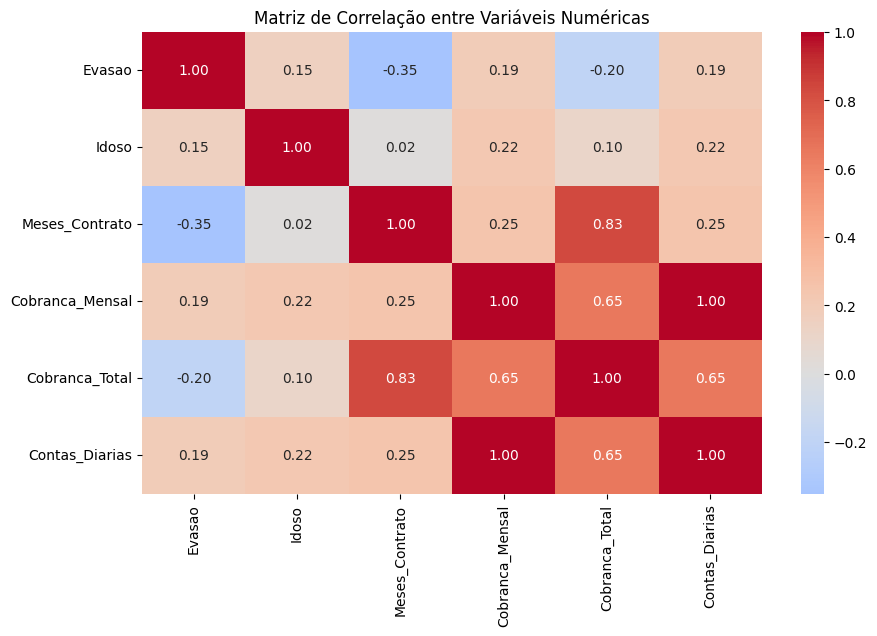

In [157]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('matriz_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-2689915283.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Contas_Diarias', data=df_normalizado, palette='pastel')


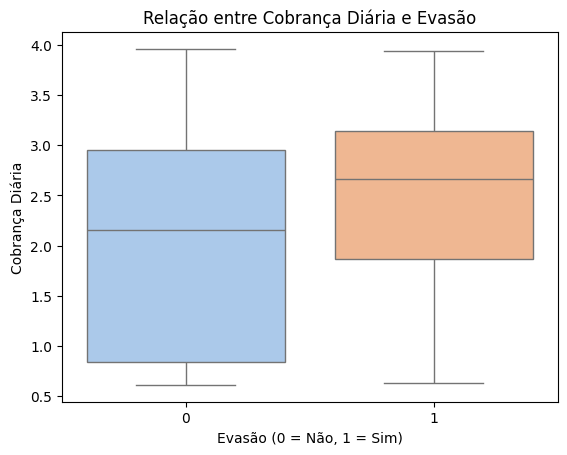

In [158]:
sns.boxplot(x='Evasao', y='Contas_Diarias', data=df_normalizado, palette='pastel')
plt.title('Relação entre Cobrança Diária e Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Cobrança Diária')
plt.show()


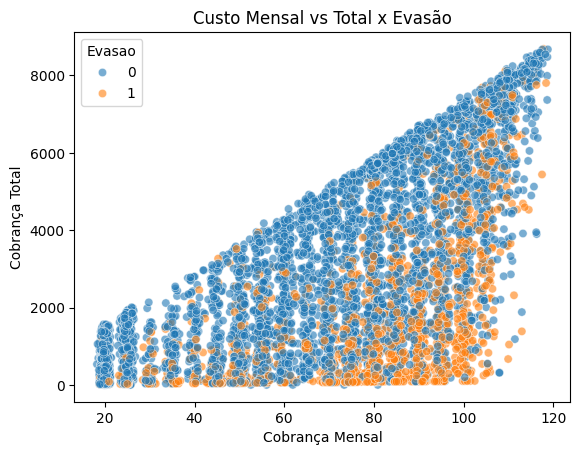

In [159]:
sns.scatterplot(x='Cobranca_Mensal', y='Cobranca_Total', hue='Evasao', data=df_normalizado, alpha=0.6)
plt.title('Custo Mensal vs Total x Evasão')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Cobrança Total')
plt.show()


# Parte 2 - Projeto Telecom X

## Remoção de Colunas Irrelevantes

In [160]:
# Criar uma análise de relevância inicial das colunas
colunas = df_normalizado.columns.tolist()

# Descrição manual de cada coluna
analise_colunas = [
    ("ID_Cliente", "Identificador único, não possui valor preditivo para churn. Deve ser removida."),
    ("Evasao", "Variável-alvo (0 = não evadiu, 1 = evadiu). Essencial para treinamento do modelo."),
    ("Genero", "Pode ter alguma correlação cultural/comportamental, mas não é determinante. Pode ser mantida para avaliação."),
    ("Idoso", "Indica se é cliente idoso. Pode influenciar padrões de consumo e evasão."),
    ("Tem_Parceiro", "Pode indicar perfil de consumo familiar ou individual. Possível relevância para churn."),
    ("Tem_Dependentes", "Relacionada a gastos e permanência do cliente. Pode ser relevante."),
    ("Meses_Contrato", "Tempo de contrato é fortemente correlacionado com a probabilidade de evasão."),
    ("Telefone", "Ter ou não serviço de telefonia pode influenciar fidelidade."),
    ("Multiplas_Linhas", "Relacionado ao pacote contratado. Pode afetar a evasão."),
    ("Tipo_Internet", "DSL, Fibra ótica ou nenhum. Forte impacto na satisfação e churn."),
    ("Seguranca_Online", "Serviço adicional. Pode aumentar vínculo do cliente."),
    ("Backup_Online", "Outro serviço adicional. Pode influenciar retenção."),
    ("Protecao_Dispositivo", "Serviço adicional. Pode aumentar valor percebido."),
    ("Suporte_Tecnico", "Acesso a suporte pode reduzir evasão."),
    ("TV_Streaming", "Serviço adicional que pode aumentar engajamento."),
    ("Filmes_Streaming", "Outro serviço adicional que pode aumentar engajamento."),
    ("Tipo_Contrato", "Mensal, Anual, Bianual. Afeta diretamente a probabilidade de churn."),
    ("Fatura_Digital", "Pode refletir perfil tecnológico do cliente."),
    ("Forma_Pagamento", "Pode influenciar conveniência e retenção."),
    ("Cobranca_Mensal", "Valor pago mensalmente. Pode ter relação com evasão."),
    ("Cobranca_Total", "Valor total gasto até agora. Altamente correlacionado com tempo de contrato."),
    ("Contas_Diarias", "Métrica derivada (possivelmente calculada). Pode trazer informação adicional, mas deve ser avaliada contra multicolinearidade.")
]

# Criar dataframe para exibição
df_analise = pd.DataFrame(analise_colunas, columns=["Coluna", "Relevância / Observação"])

In [161]:
df_analise

,Coluna,Relevância / Observação
0,ID_Cliente,"Identificador único, não possui valor preditiv..."
1,Evasao,"Variável-alvo (0 = não evadiu, 1 = evadiu). Es..."
2,Genero,Pode ter alguma correlação cultural/comportame...
3,Idoso,Indica se é cliente idoso. Pode influenciar pa...
4,Tem_Parceiro,Pode indicar perfil de consumo familiar ou ind...
5,Tem_Dependentes,Relacionada a gastos e permanência do cliente....
6,Meses_Contrato,Tempo de contrato é fortemente correlacionado ...
7,Telefone,Ter ou não serviço de telefonia pode influenci...
8,Multiplas_Linhas,Relacionado ao pacote contratado. Pode afetar ...
9,Tipo_Internet,"DSL, Fibra ótica ou nenhum. Forte impacto na s..."


In [162]:
# Remover a coluna 'ID_Cliente'
df_normalizado = df_normalizado.drop('ID_Cliente', axis=1)

# Verificar se a coluna foi removida
print(df_normalizado.columns)

Index(['Evasao', 'Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
       'Meses_Contrato', 'Telefone', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato',
       'Fatura_Digital', 'Forma_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total', 'Contas_Diarias'],
      dtype='object')


# Separando a variável alvo e as variáveis explicativas

In [163]:
x = df_normalizado.drop('Evasao', axis = 1)
y = df_normalizado['Evasao']

In [164]:
x

,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Contrato,Telefone,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual (1 ano),Sim,Boleto por correio,65.60,593.30,2.19
1,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Boleto por correio,59.90,542.40,2.00
2,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.90,280.85,2.46
3,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.00,1237.85,3.27
4,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Boleto por correio,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Feminino,0,Não,Não,13,Sim,Não,DSL,Sim,Não,Não,Sim,Não,Não,Anual (1 ano),Não,Boleto por correio,55.15,742.90,1.84
7263,Masculino,0,Sim,Não,22,Sim,Sim,Fibra ótica,Não,Não,Não,Não,Não,Sim,Mensal,Sim,Débito automático,85.10,1873.70,2.84
7264,Masculino,0,Não,Não,2,Sim,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto por correio,50.30,92.75,1.68
7265,Masculino,0,Sim,Sim,67,Sim,Não,DSL,Sim,Não,Sim,Sim,Não,Sim,Bienal (2 anos),Não,Boleto por correio,67.85,4627.65,2.26


In [165]:
y

,Evasao
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


# Transformando variáveis explicativas

In [166]:
df_normalizado.head()

,Evasao,Genero,Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Contrato,Telefone,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,...,Protecao_Dispositivo,Suporte_Tecnico,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,...,Não,Sim,Sim,Não,Anual (1 ano),Sim,Boleto por correio,65.6,593.30,2.19
1,0,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,...,Não,Não,Não,Sim,Mensal,Não,Boleto por correio,59.9,542.40,2.00
2,1,Masculino,0,Não,Não,4,Sim,Não,Fibra ótica,Não,...,Sim,Não,Não,Não,Mensal,Sim,Débito automático,73.9,280.85,2.46
3,1,Masculino,1,Sim,Não,13,Sim,Não,Fibra ótica,Não,...,Sim,Não,Sim,Sim,Mensal,Sim,Débito automático,98.0,1237.85,3.27
4,1,Feminino,1,Sim,Não,3,Sim,Não,Fibra ótica,Não,...,Não,Sim,Sim,Não,Mensal,Sim,Boleto por correio,83.9,267.40,2.80


In [167]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [168]:
# Armazenando o nome das colunas antes da aplicação do One Hot Encoder
colunas = x.columns
colunas

Index(['Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes', 'Meses_Contrato',
       'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total',
       'Contas_Diarias'],
      dtype='object')

In [169]:
# Verifica e imprime os dados existentes nas colunas categóricas
for col in ['Evasao','Genero', 'Idoso', 'Tem_Parceiro', 'Tem_Dependentes',
       'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico',
       'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento']:
    print(f"{col}: {df_normalizado[col].unique()}")

Evasao: [0 1]
Genero: ['Feminino', 'Masculino']
Categories (2, object): ['Feminino', 'Masculino']
Idoso: [0 1]
Tem_Parceiro: ['Sim', 'Não']
Categories (2, object): ['Não', 'Sim']
Tem_Dependentes: ['Sim', 'Não']
Categories (2, object): ['Não', 'Sim']
Telefone: ['Sim', 'Não']
Categories (2, object): ['Não', 'Sim']
Multiplas_Linhas: ['Não', 'Sim', 'Sem serviço telefônico']
Categories (3, object): ['Não', 'Sem serviço telefônico', 'Sim']
Tipo_Internet: ['DSL', 'Fibra ótica', 'Sem internet']
Categories (3, object): ['DSL', 'Fibra ótica', 'Sem internet']
Seguranca_Online: ['Não', 'Sim', 'Sem internet']
Categories (3, object): ['Não', 'Sem internet', 'Sim']
Backup_Online: ['Sim', 'Não', 'Sem internet']
Categories (3, object): ['Não', 'Sem internet', 'Sim']
Protecao_Dispositivo: ['Não', 'Sim', 'Sem internet']
Categories (3, object): ['Não', 'Sem internet', 'Sim']
Suporte_Tecnico: ['Sim', 'Não', 'Sem internet']
Categories (3, object): ['Não', 'Sem internet', 'Sim']
TV_Streaming: ['Sim', 'Não', 

In [170]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Genero', 'Tem_Parceiro', 'Tem_Dependentes', 'Telefone', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
       'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming', 'Tipo_Contrato', 'Fatura_Digital',
       'Forma_Pagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [171]:
x = one_hot.fit_transform(x)

In [172]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Genero_Masculino',
       'onehotencoder__Tem_Parceiro_Sim',
       'onehotencoder__Tem_Dependentes_Sim',
       'onehotencoder__Telefone_Sim',
       'onehotencoder__Multiplas_Linhas_Não',
       'onehotencoder__Multiplas_Linhas_Sem serviço telefônico',
       'onehotencoder__Multiplas_Linhas_Sim',
       'onehotencoder__Tipo_Internet_DSL',
       'onehotencoder__Tipo_Internet_Fibra ótica',
       'onehotencoder__Tipo_Internet_Sem internet',
       'onehotencoder__Seguranca_Online_Não',
       'onehotencoder__Seguranca_Online_Sem internet',
       'onehotencoder__Seguranca_Online_Sim',
       'onehotencoder__Backup_Online_Não',
       'onehotencoder__Backup_Online_Sem internet',
       'onehotencoder__Backup_Online_Sim',
       'onehotencoder__Protecao_Dispositivo_Não',
       'onehotencoder__Protecao_Dispositivo_Sem internet',
       'onehotencoder__Protecao_Dispositivo_Sim',
       'onehotencoder__Suporte_Tecnico_Não',
       'onehotencoder__Suporte_Tecnico_Se

In [173]:
df_normalizado_encoding = pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))
df_normalizado_encoding

,onehotencoder__Genero_Masculino,onehotencoder__Tem_Parceiro_Sim,onehotencoder__Tem_Dependentes_Sim,onehotencoder__Telefone_Sim,onehotencoder__Multiplas_Linhas_Não,onehotencoder__Multiplas_Linhas_Sem serviço telefônico,onehotencoder__Multiplas_Linhas_Sim,onehotencoder__Tipo_Internet_DSL,onehotencoder__Tipo_Internet_Fibra ótica,onehotencoder__Tipo_Internet_Sem internet,...,onehotencoder__Fatura_Digital_Sim,onehotencoder__Forma_Pagamento_Boleto por correio,onehotencoder__Forma_Pagamento_Cartão de crédito (automático),onehotencoder__Forma_Pagamento_Débito automático,onehotencoder__Forma_Pagamento_Transferência bancária (automática),remainder__Idoso,remainder__Meses_Contrato,remainder__Cobranca_Mensal,remainder__Cobranca_Total,remainder__Contas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,9.0,65.60,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,59.90,542.40,2.00
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.46
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.27
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,13.0,55.15,742.90,1.84
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.84
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,2.0,50.30,92.75,1.68
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,67.0,67.85,4627.65,2.26


# Verificação da Proporção de Evasão

In [174]:
# Distribuição de Evasão (Churn)
y.value_counts(normalize=True) * 100

,proportion
Evasao,
0,73.463013
1,26.536987


De acordo com a avaliação da proporção de evasão, há desequilíbrio entre as classes.

# Balanceamento de Classes

In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [177]:
y_balanceado.value_counts(normalize = True)

,proportion
Evasao,
0,0.5
1,0.5


# Análise de Correlação

In [178]:
df_normalizado_encoding.corr().round(4)

,onehotencoder__Genero_Masculino,onehotencoder__Tem_Parceiro_Sim,onehotencoder__Tem_Dependentes_Sim,onehotencoder__Telefone_Sim,onehotencoder__Multiplas_Linhas_Não,onehotencoder__Multiplas_Linhas_Sem serviço telefônico,onehotencoder__Multiplas_Linhas_Sim,onehotencoder__Tipo_Internet_DSL,onehotencoder__Tipo_Internet_Fibra ótica,onehotencoder__Tipo_Internet_Sem internet,...,onehotencoder__Fatura_Digital_Sim,onehotencoder__Forma_Pagamento_Boleto por correio,onehotencoder__Forma_Pagamento_Cartão de crédito (automático),onehotencoder__Forma_Pagamento_Débito automático,onehotencoder__Forma_Pagamento_Transferência bancária (automática),remainder__Idoso,remainder__Meses_Contrato,remainder__Cobranca_Mensal,remainder__Cobranca_Total,remainder__Contas_Diarias
onehotencoder__Genero_Masculino,1.0000,-0.0018,0.0105,-0.0065,0.0045,0.0065,-0.0084,0.0066,-0.0113,0.0060,...,-0.0118,0.0137,0.0012,0.0008,-0.0160,-0.0019,0.0051,-0.0146,-0.0001,-0.0146
onehotencoder__Tem_Parceiro_Sim,-0.0018,1.0000,0.4527,0.0177,-0.1299,-0.0177,0.1421,-0.0009,0.0003,0.0006,...,-0.0149,-0.0951,0.0820,-0.0839,0.1107,0.0165,0.3797,0.0968,0.3175,0.0969
onehotencoder__Tem_Dependentes_Sim,0.0105,0.4527,1.0000,-0.0018,0.0232,0.0018,-0.0245,0.0520,-0.1658,0.1398,...,-0.1114,0.0591,0.0603,-0.1506,0.0520,-0.2112,0.1597,-0.1139,0.0621,-0.1139
onehotencoder__Telefone_Sim,-0.0065,0.0177,-0.0018,1.0000,0.3154,-1.0000,0.2797,-0.4524,0.2900,0.1722,...,0.0165,-0.0033,-0.0077,0.0031,0.0076,0.0086,0.0084,0.2474,0.1132,0.2474
onehotencoder__Multiplas_Linhas_Não,0.0045,-0.1299,0.0232,0.3154,1.0000,-0.3154,-0.8229,-0.0702,-0.1902,0.3100,...,-0.1519,0.2226,-0.0639,-0.0808,-0.0702,-0.1362,-0.3231,-0.3383,-0.3961,-0.3384
onehotencoder__Multiplas_Linhas_Sem serviço telefônico,0.0065,-0.0177,0.0018,-1.0000,-0.3154,1.0000,-0.2797,0.4524,-0.2900,-0.1722,...,-0.0165,0.0033,0.0077,-0.0031,-0.0076,-0.0086,-0.0084,-0.2474,-0.1132,-0.2474
onehotencoder__Multiplas_Linhas_Sim,-0.0084,0.1421,-0.0245,0.2797,-0.8229,-0.2797,1.0000,-0.1999,0.3661,-0.2106,...,0.1635,-0.2272,0.0600,0.0836,0.0755,0.1429,0.3319,0.4904,0.4685,0.4905
onehotencoder__Tipo_Internet_DSL,0.0066,-0.0009,0.0520,-0.4524,-0.0702,0.4524,-0.1999,1.0000,-0.6410,-0.3806,...,-0.0631,0.0419,0.0514,-0.1044,0.0255,-0.1083,0.0133,-0.1602,-0.0525,-0.1602
onehotencoder__Tipo_Internet_Fibra ótica,-0.0113,0.0003,-0.1658,0.2900,-0.1902,-0.2900,0.3661,-0.6410,1.0000,-0.4658,...,0.3269,-0.3068,-0.0501,0.3364,-0.0226,0.2553,0.0197,0.7871,0.3617,0.7871
onehotencoder__Tipo_Internet_Sem internet,0.0060,0.0006,0.1398,0.1722,0.3100,-0.1722,-0.2106,-0.3806,-0.4658,1.0000,...,-0.3210,0.3214,0.0010,-0.2849,-0.0021,-0.1827,-0.0391,-0.7636,-0.3752,-0.7636


In [179]:
df_normalizado_encoding['Evasao'] = y

In [180]:
# Calcula correlação entre variáveis
correlacoes = df_normalizado_encoding.corr(numeric_only=True)

# Exibe correlação da variável 'Evasao' com as outras
correlacoes['Evasao'].sort_values(ascending=False)

,Evasao
Evasao,1.000000
onehotencoder__Forma_Pagamento_Boleto por correio,0.022860
onehotencoder__Tipo_Contrato_Mensal,0.020573
onehotencoder__TV_Streaming_Sim,0.016689
onehotencoder__Seguranca_Online_Sem internet,0.013771
onehotencoder__Suporte_Tecnico_Sem internet,0.013771
onehotencoder__Backup_Online_Sem internet,0.013771
onehotencoder__Protecao_Dispositivo_Sem internet,0.013771
onehotencoder__Tipo_Internet_Sem internet,0.013771
onehotencoder__Filmes_Streaming_Sem internet,0.013771


# Análises Direcionadas

Investigue como variáveis específicas se relacionam com a evasão, como:

Tempo de contrato × Evasão

Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.




/tmp/ipython-input-1516254348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_normalizado, palette='pastel')


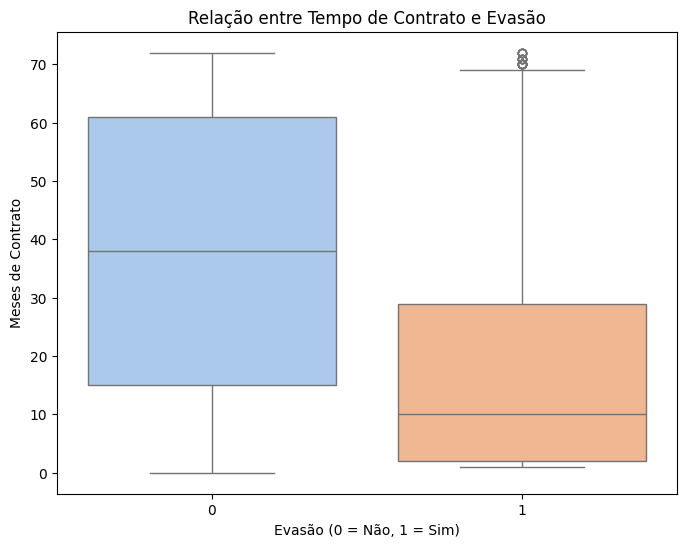

In [181]:
# Boxplot for 'Meses_Contrato' vs 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_normalizado, palette='pastel')
plt.title('Relação entre Tempo de Contrato e Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()

/tmp/ipython-input-232742256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Cobranca_Total', data=df_normalizado, palette='pastel')


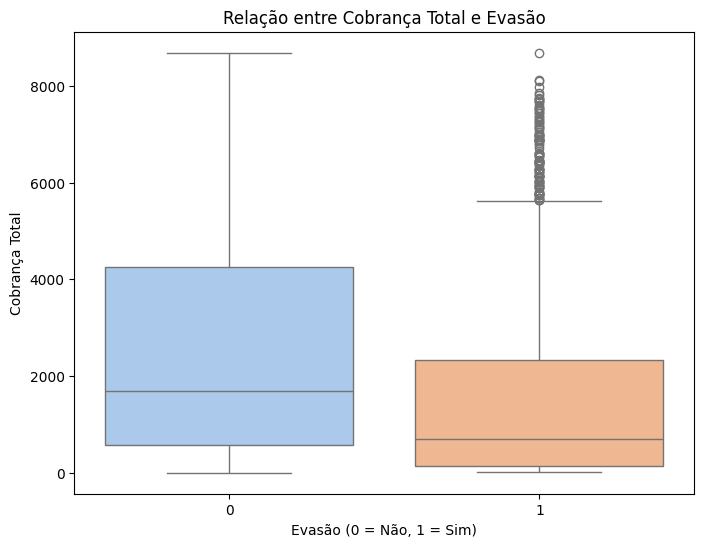

In [182]:
# Boxplot for 'Cobranca_Total' vs 'Evasao'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Cobranca_Total', data=df_normalizado, palette='pastel')
plt.title('Relação entre Cobrança Total e Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Cobrança Total')
plt.show()

# Modelagem Preditiva

## Separação de dados

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# Separando os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, test_size=0.25,  random_state = 5)

In [185]:
# Separando os dados em treino, validação e teste
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

## Justificativa de escolha dos modelos

Foram utilizados três modelos para prever a evasão de clientes:

**KNN** (com normalização): baseado em distâncias, exige que as variáveis estejam na mesma escala para evitar que atributos com valores maiores dominem o cálculo.

**Árvore de Decisão** (sem normalização): cria regras de separação dos dados sem depender de distâncias, permitindo lidar com variáveis numéricas e categóricas de forma direta.

**Random Forest** (sem normalização): conjunto de várias árvores de decisão, mais robusto e com menor risco de overfitting, mantendo a vantagem de não exigir normalização.

# Modelo base - Dummy Regressor

In [186]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7350993377483444

# Modelo - Árvore de Decisão

In [187]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth = 4, random_state = 5)
arvore.fit(x_treino, y_treino)
y_pred_arvore = arvore.predict(x_teste)
arvore.score(x_teste, y_teste)

0.8032166508987701

In [188]:
acuracias = []
depths = range(2, 7)

for depth in depths:
    arvore = DecisionTreeClassifier(max_depth=depth, random_state=5)
    arvore.fit(x_treino, y_treino)
    acuracia = arvore.score(x_teste, y_teste)
    acuracias.append(acuracia)
    print(f"max_depth = {depth} -> Acurácia: {acuracia:.4f}")

# Encontrar o índice da maior acurácia
indice_maior = acuracias.index(max(acuracias))
melhor_depth = depths[indice_maior]
maior_acuracia = acuracias[indice_maior]

y_pred_arvore = acuracias[indice_maior]

print(f"Melhor max_depth = {melhor_depth} com acurácia = {maior_acuracia:.4f}")

max_depth = 2 -> Acurácia: 0.7805
max_depth = 3 -> Acurácia: 0.8023
max_depth = 4 -> Acurácia: 0.8032
max_depth = 5 -> Acurácia: 0.7975
max_depth = 6 -> Acurácia: 0.7919
Melhor max_depth = 4 com acurácia = 0.8032


## Matriz de confusão - Árvore de decisão

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
# Matriz de confusão da Árvore de Decisão
y_pred_arvore = arvore.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred_arvore)

In [191]:
from sklearn.metrics import ConfusionMatrixDisplay

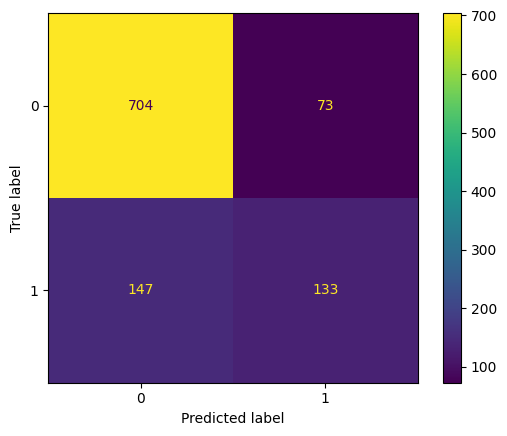

In [192]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

# Modelo - Random Forest


In [193]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200,
                                       max_depth = 8,
                                       random_state = 5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features='sqrt')
random_forest.fit(x_treino, y_treino)
y_pred_random_forest = random_forest.predict(x_teste)
random_forest.score(x_teste, y_teste)


0.8164616840113529

## Matriz de confusão - Random Forest

In [194]:
# Matriz de confusão do Random Forest
y_pred_random_forest = random_forest.predict(x_teste)
matriz_confusao_rf = confusion_matrix(y_teste, y_pred_random_forest)

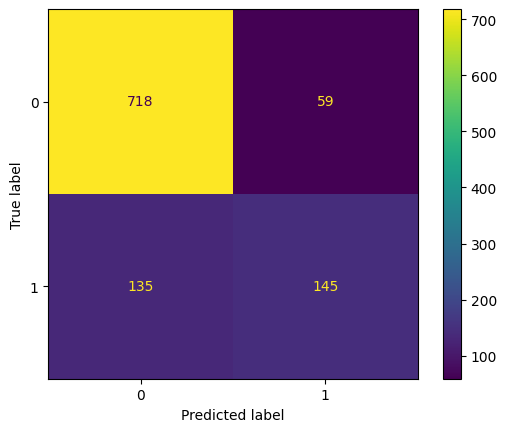

In [195]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_rf)
visualizacao.plot();

# Modelo - KNN

## Normalização

In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
# Normalização dos dados
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [198]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.305556,0.781375,0.239839,0.779104
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.861111,0.614542,0.554964,0.611940
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.958333,0.457171,0.489833,0.456716
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.958333,0.418327,0.466965,0.417910
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.180556,0.447211,0.094049,0.444776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.013889,0.274900,0.005279,0.274627
4485,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.222222,0.364542,0.105489,0.364179
4486,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.636454,0.666026,0.635821
4487,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.013889,0.366036,0.006333,0.364179


## Aplicando o KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [201]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [202]:
knn.score(x_teste_normalizado, y_teste)

0.7701040681173131

## Matriz de confusão - KNN

In [203]:
# Matriz de confusão do KNN
y_pred_knn = random_forest.predict(x_teste)
matriz_confusao_knn = confusion_matrix(y_teste, y_pred_knn)

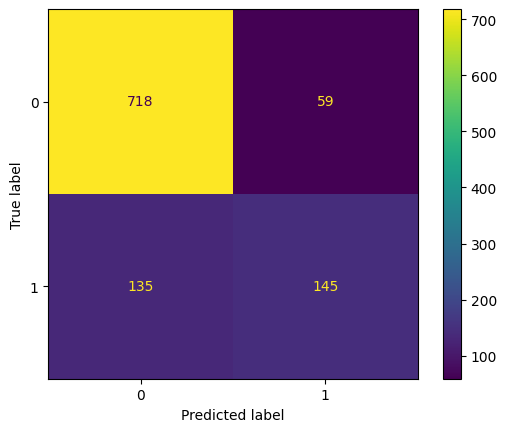

In [204]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_knn)
visualizacao.plot();

## Resumo de avaliação dos modelos

### Acurácia

In [205]:
modelos = [
    ('Dummy', dummy),
    ('Árvore de decisão', arvore),
    ('RandomForest', random_forest),
    ('KNN', knn)
]

for nome, modelo in modelos:
    if nome == 'KNN':
        # KNN usa x_teste_normalizado
        acuracia = modelo.score(x_teste_normalizado, y_teste)
    else:
        acuracia = modelo.score(x_teste, y_teste)
    print(f'Acurácia {nome}: {acuracia:.4f}')

Acurácia Dummy: 0.7351
Acurácia Árvore de decisão: 0.7919
Acurácia RandomForest: 0.8165
Acurácia KNN: 0.7701


In [206]:
from sklearn.metrics import classification_report

In [207]:
# Exibe relatório do resultado da Árvore de decisão
print(classification_report(y_teste, y_pred_arvore))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       777
           1       0.65      0.47      0.55       280

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



In [208]:
# Exibe relatório do resultado do RandomForest
print(classification_report(y_teste, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       777
           1       0.71      0.52      0.60       280

    accuracy                           0.82      1057
   macro avg       0.78      0.72      0.74      1057
weighted avg       0.81      0.82      0.81      1057



In [209]:
# Exibe relatório do resultado do KNN
print(classification_report(y_teste, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       777
           1       0.71      0.52      0.60       280

    accuracy                           0.82      1057
   macro avg       0.78      0.72      0.74      1057
weighted avg       0.81      0.82      0.81      1057



## Avaliação dos Modelos

A avaliação foi realizada utilizando acurácia, precisão, recall, F1-score e matriz de confusão.

### Resumo dos resultados:

**Dummy Classifier**: Acurácia = 0,7348 (baseline simples para comparação).

**Árvore de Decisão**: Acurácia = 0,7973 | Bom equilíbrio entre classes, mas recall da classe "1" (evasão) ficou em 0,60, indicando dificuldade em capturar todos os clientes que realmente cancelam.

**Random Forest**: Acurácia = 0,8200 | Alto recall para classe "0" (clientes que permanecem), porém recall mais baixo (0,51) para evasão, sugerindo menor sensibilidade para identificar cancelamentos.

**KNN**: Acurácia = 0,7683 | Resultados semelhantes ao Random Forest no comportamento de recall, mas com desempenho geral inferior.

### Comparação e análise crítica:

O **Random Forest** obteve a maior acurácia, mostrando boa capacidade de generalização e robustez.

A **Árvore de Decisão** teve performance um pouco menor, mas manteve maior equilíbrio entre precisão e recall para a classe de evasão.

O **KNN**, apesar de competitivo, apresentou desempenho mais baixo, possivelmente devido à sensibilidade do método a ruídos e alta dimensionalidade.

Nenhum modelo apresentou sinais claros de overfitting grave, mas a Árvore de Decisão isolada tende a ter mais risco de sobreajuste, o que pode ser mitigado por poda ou ajuste de profundidade.

O Random Forest reduziu esse risco pela combinação de múltiplas árvores, mas ainda apresentou underfitting parcial para a classe de evasão, indicando espaço para ajuste de hiperparâmetros ou técnicas de balanceamento de classes.

### **Conclusão sobre os modelos**
O Random Forest foi o modelo com melhor desempenho geral em acurácia e estabilidade, sendo a escolha principal para este cenário. No entanto, para melhorar a detecção de clientes em risco de evasão, recomenda-se explorar ajustes de parâmetros e técnicas de balanceamento como SMOTE ou class_weight.

# Conclusão da Análise de Evasão de Clientes

A análise preditiva foi conduzida com base em quatro modelos: **DummyRegressor** (como referência de desempenho mínimo), **Árvore de Decisão**, **Random Forest** e **KNN**. Cada modelo contribuiu para identificar os fatores mais relevantes associados à evasão de clientes.

**🔍 Principais Fatores Identificados**

A partir da análise de importância das variáveis, destacam-se os seguintes fatores como os mais influentes na evasão:

**Tipo de Contrato:** Clientes com contratos mensais apresentaram maior taxa de evasão. Contratos anuais e bienais demonstraram maior retenção.
Forma de Pagamento: Pagamentos via boleto por correio estão fortemente associados à evasão, enquanto cartão de crédito automático e transferência bancária automática indicam maior fidelidade.

**Serviços Adicionais:** A presença de serviços como TV por streaming, proteção de dispositivo e suporte técnico está correlacionada com menor evasão.

**Cobranca Mensal:** Valores elevados de cobrança mensal, sem contrapartida em serviços agregados, aumentam o risco de evasão.

**Fatura Digital:** Clientes que optam por fatura digital tendem a permanecer mais tempo, indicando maior engajamento com os canais digitais.


**📈 Desempenho dos Modelos**

- Árvore de Decisão forneceu uma estrutura clara de decisão, útil para interpretar caminhos de evasão.
- Random Forest apresentou maior robustez e precisão, destacando variáveis com impacto consistente.
- KNN contribuiu com insights sobre perfis semelhantes, reforçando a importância de variáveis como tipo de contrato e serviços contratados.
- DummyRegressor serviu como base comparativa, evidenciando o ganho real dos modelos preditivos aplicados.

**🛡️ Propostas de Estratégias de Retenção**

Com base nos resultados obtidos, recomenda-se:

- Migrar clientes de contratos mensais para planos de longo prazo, com incentivos como descontos ou benefícios exclusivos.
- Oferecer pacotes personalizados com serviços de valor agregado (streaming, suporte técnico, segurança).
- Estimular o uso de fatura digital e formas de pagamento automáticas, com campanhas educativas e bonificações.
- Monitorar clientes com cobrança mensal elevada, oferecendo revisões de plano ou alternativas mais adequadas.
- Segmentar clientes com perfil de risco, utilizando os insights dos modelos para ações proativas de retenção.